# Participle Research

## 1. Data Extract

In [13]:
from test import test
import sys
sys.path.append('..')
import action

handle = open("../Process_type/examples.txt", "r")
text = handle.read()
handle.close()
list_, N = [0], 0
for i in range(len(text)):
    if text[i] == '.':
        last = i
    N += 1
    if N > 10000:
        list_.append(last)
        N = 0
root_list = []
for i in range(len(list_) - 1):
    root_list = root_list + action.construct_tree(text[list_[i] : list_[i + 1]])

list_ = test(root_list)
print(len(list_))

165


In [14]:
def sub(name, list_):
    if name in list_:
        return 1
    return 0

dict_ = dict()
dict_1, dict_2, dict_3  = {}, {}, {}
for i in list_:
    dict_['Parent' + i[4]] = []
    dict_3['Parent' + i[4]] = []
    for j in i[3]:
        dict_[j[1]] = []
        dict_[j[0].value.postag] = []
        dict_1[j[1]] = []
        dict_2[j[0].value.postag] = []

dict_['Sentence'], dict_['Lemma'], dict_['Token'] = [], [], []

for i in list_:
    dict_['Sentence'].append(i[0])
    dict_['Lemma'].append(i[1])
    dict_['Token'].append(i[2])
    for j in dict_1.keys():
        dict_[j].append(sub(j, [k[1] for k in i[3]]))
    for j in dict_2.keys():
        dict_[j].append(sub(j, [k[0].value.postag for k in i[3]]))
    for j in dict_3.keys():
        dict_[j].append(sub('Parent' + i[4], [j]))
import pandas as pd
df = pd.DataFrame(data = dict_)
df.to_csv('Part.csv', index = False, encoding = 'utf')

## 2. Data Structure Research

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('Part_mark.csv')
del df['Sentence']
del df['Lemma']
del df['Token']
y = df['Answer']
del df['Answer']
array = df.as_matrix()
print(array.shape)

(165, 41)


/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### 2.1. PCA

<IPython.core.display.Javascript object>


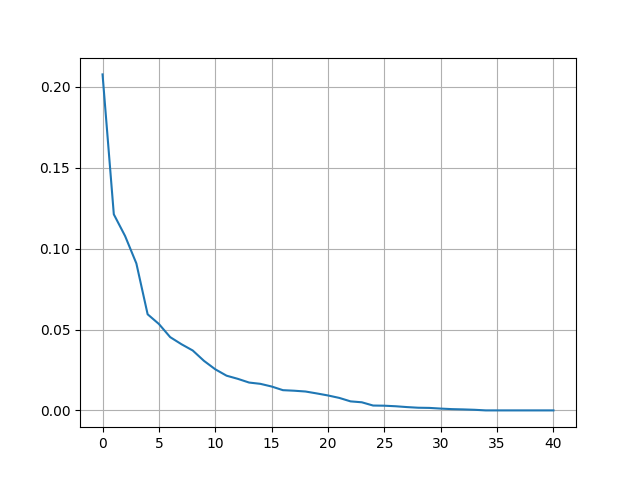

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
data = array.copy()
pca = PCA(n_components = 41)
pca.fit(data)
ratio = pca.explained_variance_ratio_
% matplotlib notebook
plt.plot([i for i in range(len(ratio))], ratio)
plt.grid()

### 2.2. 2D Visualisation

(165, 2)


<IPython.core.display.Javascript object>


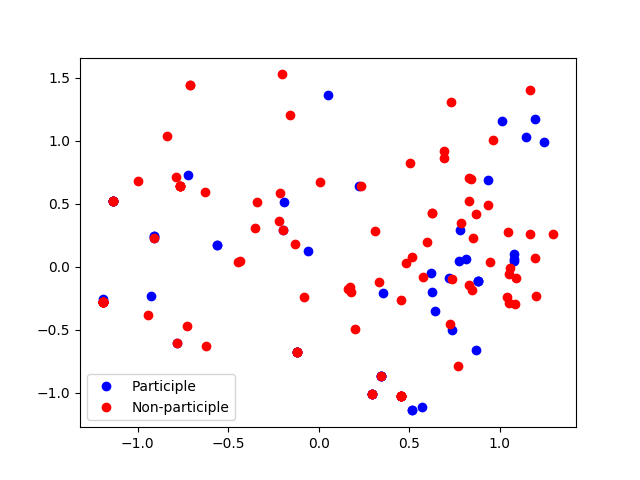

In [17]:
% matplotlib notebook
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
print(data.shape)
plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == 1],
         [data[i][1] for i in range(data.shape[0]) if y[i] == 1],
         'bo')

plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == 0],
         [data[i][1] for i in range(data.shape[0]) if y[i] == 0],
         'ro')

plt.legend(['Participle', 'Non-participle'])

### 2.3. 3D Visualisation

<IPython.core.display.Javascript object>


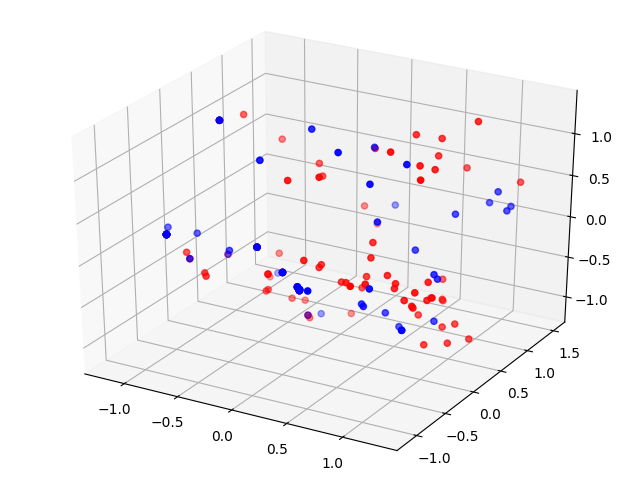

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
xs = [data[i][0] for i in range(data.shape[0]) if y[i] == 1]
ys = [data[i][1] for i in range(data.shape[0]) if y[i] == 1]
zs = [data[i][2] for i in range(data.shape[0]) if y[i] == 1]
ax.scatter(xs, ys, zs, c = 'b')

xs = [data[i][0] for i in range(data.shape[0]) if y[i] == 0]
ys = [data[i][1] for i in range(data.shape[0]) if y[i] == 0]
zs = [data[i][2] for i in range(data.shape[0]) if y[i] == 0]
ax.scatter(xs, ys, zs, c= 'r')

## 3. Parent Postag

In [19]:
keys = []
for i in df.columns.values:
    if 'Parent' in i:
        keys.append(i)
dict_1, dict_2 = dict(), dict()
for j in keys:
    dict_1[j] = 0
    dict_2[j] = 0
for i in range(len(y)):
    for j in keys:
        if df[j][i] == 1:
            dict_1[j] += 1
            if y[i] == 1:
                dict_2[j] += 1
for j in keys:
    dict_2[j] /= dict_1[j]
    print(j, dict_2[j], dict_1[j])

ParentAUX 0.0 1
ParentNOUN 0.5189873417721519 79
ParentNUM 0.0 1
ParentNon 0.15789473684210525 19
ParentPRON 0.14285714285714285 7
ParentPROPN 0.7142857142857143 7
ParentPUNCT 0.2 5
ParentVERB 0.32608695652173914 46


Therefore, we have two types of parent postag which possibly are participle mark. This postags are NOUN and PROPN.

In [20]:
def try_parent(df):
    list_part = ['ParentNOUN', 'ParentPROPN']
    n = len(df)
    list_ = []
    for i in range(n):
        type_ = ''
        for j in df.columns.values:
            if df[j][i] == 1 and 'Parent' in j:
                type_ = j
        if not type_ in list_part:
            list_.append(i)
    for i in list_:
        df = df.drop(i, axis = 0)
    return df

## 4. Research Of Data Filtred On Parent

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('Part_mark.csv')
df = try_parent(df)
del df['Sentence']
del df['Lemma']
del df['Token']
y = df['Answer']
del df['Answer']
for i in df.columns.values:
    if 'Parent' in i:
        del df[i]
array = df.as_matrix()
print(array.shape)

(86, 33)


/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<IPython.core.display.Javascript object>


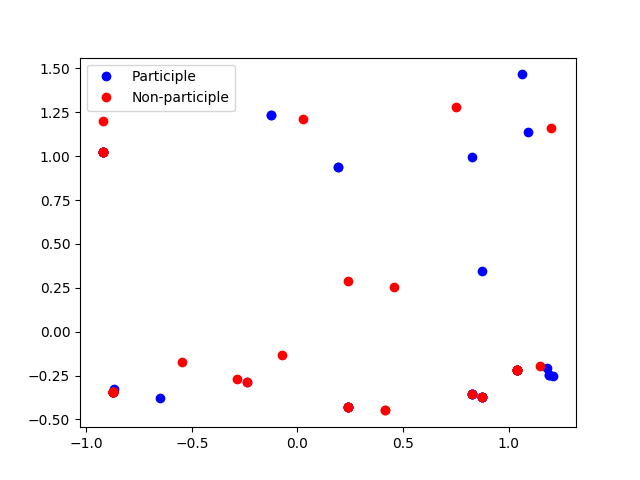

In [22]:
% matplotlib notebook
data = array.copy()
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
plt.plot([data[i][0] for i in range(data.shape[0]) if y[y.index[i]] == 1],
         [data[i][1] for i in range(data.shape[0]) if y[y.index[i]] == 1],
         'bo')

plt.plot([data[i][0] for i in range(data.shape[0]) if y[y.index[i]] == 0],
         [data[i][1] for i in range(data.shape[0]) if y[y.index[i]] == 0],
         'ro')

plt.legend(['Participle', 'Non-participle'])

<IPython.core.display.Javascript object>


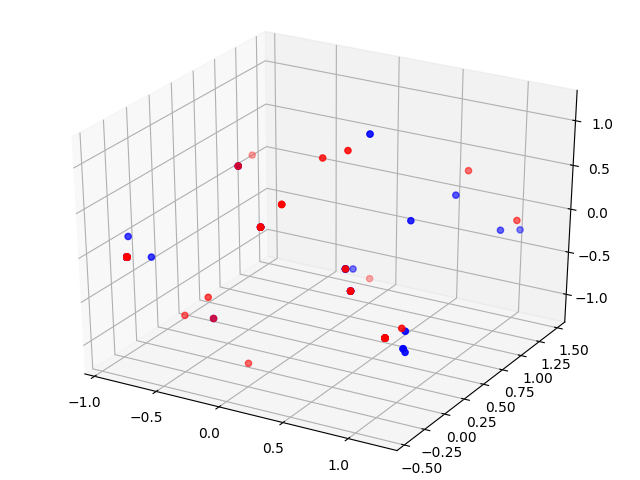

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
xs = [data[i][0] for i in range(data.shape[0]) if y[y.index[i]] == 1]
ys = [data[i][1] for i in range(data.shape[0]) if y[y.index[i]] == 1]
zs = [data[i][2] for i in range(data.shape[0]) if y[y.index[i]] == 1]
ax.scatter(xs, ys, zs, c = 'b')

xs = [data[i][0] for i in range(data.shape[0]) if y[y.index[i]] == 0]
ys = [data[i][1] for i in range(data.shape[0]) if y[y.index[i]] == 0]
zs = [data[i][2] for i in range(data.shape[0]) if y[y.index[i]] == 0]
ax.scatter(xs, ys, zs, c= 'r')

In [39]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors = 2)
data = array.copy()
knn.fit(array, y)
y_pred = knn.predict(array)
sum_1, sum_2 = 0., 0.
for i in range(len(y)):
    if y_pred[i] == 1:
        sum_1 += 1
        if y[y.index[i]] == 1:
            sum_2 += 1
print(sum_2/sum_1)

1.0
